In [868]:
import pandas as pd
import numpy as np
from nlpdb import DB
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import requests
import seaborn as sns
sns.set_palette(sns.color_palette("Set3", 20))
sns.set_context('poster')
sns.set_style({'font.family': ['Serif']})

In [510]:
__marianne_token__ = '6faaf0f33949745684fdf0a59dfac78bd41562a3da95c009c0fb155458fa55b0d0199701f3309b9878d19' #WALL, OFFLINE
__marianne_id__ = 395888840
__encryptify_token__ = '463989315e451575bf4d06b185ebda53b10ccd33438c95f9dbe27af4dadfe19897dfd326181ad9a97bd6d'
__encryptify_id__ = 133644218
__service_token__ = 'd556709dd556709dd556709de2d53779b1dd556d556709d8f21592aa71dfeb6a97cab4e'

token = __marianne_token__
#token = __encryptify_token__
vk_id = __marianne_id__

URL = 'https://api.vk.com/method/'

class ResponseError(Exception):
    def __init__(self, resp):
        try:
            msg = 'Got the response with error: {}'.format(resp['error']['error_msg'])
        except:
            msg = resp
        Exception.__init__(self, msg)
        
def vkapi(func):
    def inner(*args, **kwargs):
        params = func(*args, **kwargs)
        counter = 0
        while counter < 2:
            url = URL + params #+ 'access_token={}'.format(token)
            resp = requests.get(url).json()
            try:
                return resp['response']
            except KeyError:
                if 'Too many requests per second' in resp['error']['error_msg']:
                    print('Hit the frequency limit. Retry in 1 sec... Retry {}'.format(counter))
                    sleep(1)
                    counter += 1
                    continue
                elif 'Too many API calls' in resp['error']['error_msg']:
                    #raise TooManyApiCalls
                    sleep(1)
                    counter += 1
                    continue
                elif 'Too many operations' in resp['error']['error_msg']:
                    print('Hit the TooManyOperationsError. Sleep 1 sec and continue/ Retry: {}'.format(counter))
                    from re import sub
                    params = sub('&req=[0-9]{2}&', '&req=1&', params)
                    #sleep(1)
                    counter += 1
                    continue
                else:
                    raise ResponseError(resp)
        return None
    return inner

@vkapi
def groups_getById(group_ids):
    return 'groups.getById?v=5.71&group_ids={}&access_token={}'.format(group_ids, __marianne_token__)

@vkapi
def database_getCountries():
    return 'database.getCountries?need_all=1&v=5.71&access_token={}'.format(__marianne_token__)

@vkapi
def database_getCitiesById(cities):
    return 'database.getCitiesById?city_ids={}&v=5.71&access_token={}'.format(','.join(cities), __marianne_token__)

In [511]:
city_ids = dcdf.city.unique().tolist()
city_ids = [str(x) for x in city_ids if x]
city_names = database_getCitiesById(city_ids)

In [519]:
df_city_names = pd.DataFrame(city_names)
df_city_names.rename(columns={'id': 'city', 'title': 'city_name'}, inplace=True)
df_city_names.head()

,city,city_name
0,2,Санкт-Петербург
1,86,Мичуринск
2,1,Москва
3,99,Новосибирск
4,1802375,Miami


In [442]:
df = pd.read_pickle('df_indexed.pickle')
df.head()

,characteristic,club_id,group,note,post_id,rubric_id,text,user_id,club_name,rubric_name,first_name,last_name,sex,bdate,country,city,date,likes
comment_id,,,,,,,,,,,,,,,,,,
112510789_500477_501230,None,112510789,РЕВОЛЮЦИЯ,None,500477,1,Слава Великой Октябрьской Революции,211751432,Mash | Мэш,+Октябрьск* +революц*,Парниша,Просвета,2,1992-05-25,1,2,2017-10-26 02:04:38,4.0
15548215_542596_542599,None,15548215,РЕВОЛЮЦИЯ,None,542596,1,Сегодня пиарная машина Кремля устроила очередн...,430960989,ВЕДОМОСТИ,+Октябрьск* +революц*,Максим,Сараев,2,1992-01-03,None,None,2017-11-21 10:25:41,3.0
15548215_517193_517206,None,15548215,СОВЕТСКИЙ ПАНТЕОН,None,517193,10,"Я пости засмеялся. Чувак, обвиняюший Ленина в ...",430960989,ВЕДОМОСТИ,+Ленин* -Ленингр*,Максим,Сараев,2,1992-01-03,None,None,2017-10-06 04:43:04,1.0
29534144_7072909_7073095,None,29534144,СОВЕТСКАЯ АРМИЯ,None,7072909,17,Cамое страшное в сегодняшней России — это не к...,430960989,Лентач,РККА*,Максим,Сараев,2,1992-01-03,None,None,2017-08-25 13:25:41,10.0
29534144_7072909_7073095,None,29534144,СОВЕТСКАЯ АРМИЯ,None,7072909,17,Cамое страшное в сегодняшней России — это не к...,430960989,Лентач,РККА*,Максим,Сараев,2,1992-01-03,None,None,2017-08-25 13:25:41,10.0


In [427]:
df['post'] = df.club_id.astype(str) + '_' + df.post_id
df['post_link'] = 'https://vk.com/public' + df.club_id.astype(str) + '?w=wall-' + df.post

In [196]:
df[['text', 'post_link']].drop_duplicates(['text']).to_excel('text_url.xls')

In [4]:
db = DB()
res = db.custom_get('select * from id_rubric', [])

In [5]:
id_rubric = pd.DataFrame(res)
id_rubric.index = id_rubric.comment_id

In [268]:
id_rubric[id_rubric.rubric_id==44].shape

(305, 8)

In [428]:
merged = df.reset_index().join(id_rubric, on='comment_id', rsuffix='_')

In [270]:
#merged = merged.drop_duplicates(['comment_id', 'rubric_id_x'])

In [429]:
cleaned = merged[merged.is_deleted==0]

In [430]:
cleaned.head()

,comment_id,characteristic,club_id,group,note,post_id,rubric_id,text,user_id,club_name,...,post,post_link,idx,comment_id_,rubric_id_,characteristic_,note_,is_deleted,is_chefdoeuvre,polarity
0,112510789_500477_501230,None,112510789,РЕВОЛЮЦИЯ,None,500477,1,Слава Великой Октябрьской Революции,211751432,Mash | Мэш,...,112510789_500477,https://vk.com/public112510789?w=wall-11251078...,1_112510789_500477_501230,112510789_500477_501230,1.0,None,None,0.0,0.0,2.0
1,15548215_542596_542599,None,15548215,РЕВОЛЮЦИЯ,None,542596,1,Сегодня пиарная машина Кремля устроила очередн...,430960989,ВЕДОМОСТИ,...,15548215_542596,https://vk.com/public15548215?w=wall-15548215_...,1_15548215_542596_542599,15548215_542596_542599,1.0,None,None,0.0,0.0,1.0
1,15548215_542596_542599,None,15548215,РЕВОЛЮЦИЯ,None,542596,1,Сегодня пиарная машина Кремля устроила очередн...,430960989,ВЕДОМОСТИ,...,15548215_542596,https://vk.com/public15548215?w=wall-15548215_...,29_15548215_542596_542599,15548215_542596_542599,29.0,None,None,0.0,0.0,NaN
1,15548215_542596_542599,None,15548215,РЕВОЛЮЦИЯ,None,542596,1,Сегодня пиарная машина Кремля устроила очередн...,430960989,ВЕДОМОСТИ,...,15548215_542596,https://vk.com/public15548215?w=wall-15548215_...,33_15548215_542596_542599,15548215_542596_542599,33.0,Критика современной власти,,0.0,0.0,NaN
1,15548215_542596_542599,None,15548215,РЕВОЛЮЦИЯ,None,542596,1,Сегодня пиарная машина Кремля устроила очередн...,430960989,ВЕДОМОСТИ,...,15548215_542596,https://vk.com/public15548215?w=wall-15548215_...,69_15548215_542596_542599,15548215_542596_542599,69.0,критика современной власти,,0.0,0.0,NaN


,comment_id,date,datecol
date,,,
2017-06-24 19:33:22,15755094_16632149_16632498,2017-06-24 19:33:22,2017-06-24
2017-05-04 11:55:03,29534144_6225767_6226687,2017-05-04 11:55:03,2017-05-04
2017-09-21 16:37:55,40316705_21103896_21104268,2017-09-21 16:37:55,2017-09-21
2017-09-29 08:20:32,40316705_21220290_21220499,2017-09-29 08:20:32,2017-09-29
2017-05-08 10:07:09,15755094_15877874_15878722,2017-05-08 10:07:09,2017-05-08


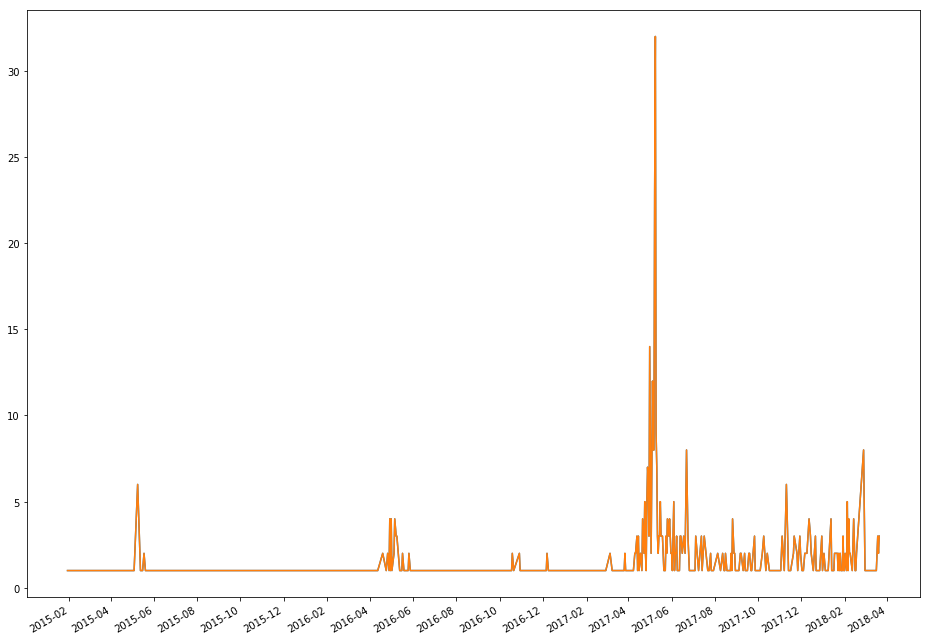

In [114]:
#fig = plt.figure(figsize=(16,12))
fig, ax = plt.subplots(figsize=(16,12))
#ax = temporal.groupby(['date']).count().plot(figsize=(16,12))
ax.plot(temporal.groupby(['datecol']).count())
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()
plt.savefig('dates_36.png')

In [197]:
#temporal.groupby(['datecol']).count()

In [172]:
#Rubric 36
temporal = cleaned[cleaned.rubric_id_x==36][['comment_id', 'date']]
temporal.index = temporal.date
temporal = temporal.loc['2015-01-01':]
temporal['datecol'] = temporal.date.dt.date
#temporal.index = temporal.date

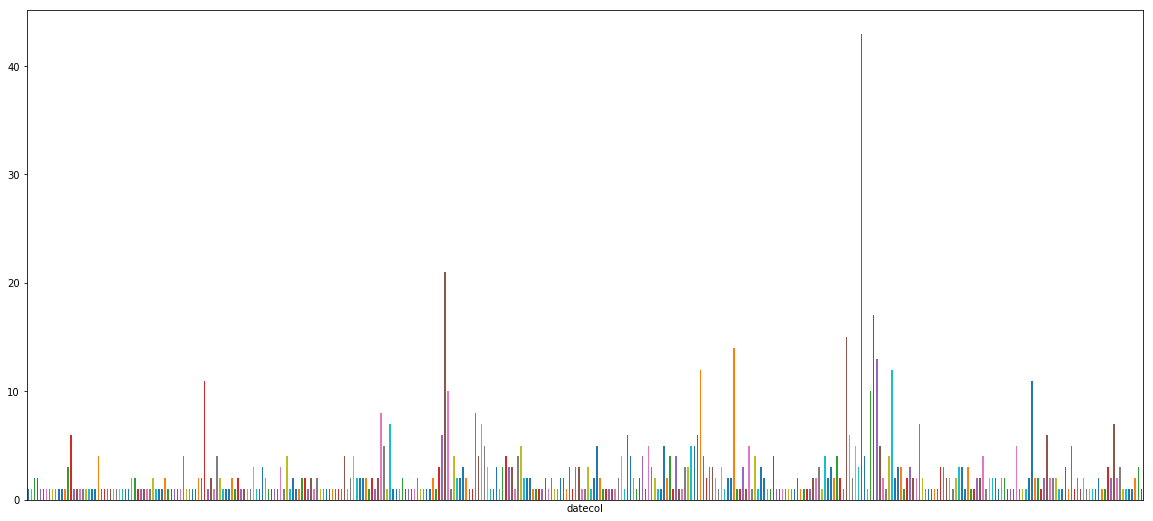

In [173]:
draw_count_by_date(10)

In [883]:
def drop_rubric(df, rubric_id):
    return df.loc[df.rubric_id != rubric_id]
to_keep = [1, 2, 3, 7, 8, 9, 10, 14, 15, 16, 18, 19, 20, 21, 22, 24, 28, 30, 31, 32, 33, 36, 40, 41, 42, 43, 44, 45, 46, 48, 53, 54, 55, 60, 61, 62, 63, 64, 66, 67, 68, 69]
to_delete = [x for x in range(1,73) if x not in to_keep]
ddf = cleaned
for id in to_delete:
    ddf = drop_rubric(ddf, id)

In [884]:
def clean_keywords(df, rubric_id, keyword):
    return df.loc[~((df.rubric_id == rubric_id) & df.text.str.contains(keyword))]
lenin_kw = ['ул.', 'ул ', 'проспект', 'просп.', 'площадь', 'площ.', 'метро', 'ленинск', 'станция']
lenin = list(zip([10 for x in range(len(lenin_kw))],
                 [x for x in lenin_kw]))
to_clean = [(44, 'хрущевк'), (44, 'хрущевок'), (22, 'сталинк'), (22, 'сталинок')] + lenin
print(to_clean)
cdf = ddf
for args in to_clean:
    cdf = clean_keywords(cdf, *args)

[(44, 'хрущевк'), (44, 'хрущевок'), (22, 'сталинк'), (22, 'сталинок'), (10, 'ул.'), (10, 'ул '), (10, 'проспект'), (10, 'просп.'), (10, 'площадь'), (10, 'площ.'), (10, 'метро'), (10, 'ленинск'), (10, 'станция')]


In [885]:
dcdf = cdf.drop_duplicates(['rubric_id', 'comment_id'])

In [332]:
#df.rubric_id.astype(int).unique()

In [886]:
r = dcdf.replace({'rubric_id': {32:36}})
#rr = r.replace({'rubric_name': {'9 мая': '+Велик* +отечественн* +войн*'}})

r = r.replace({'rubric_id': {33:36}})

#rrrr = rrr.replace({'rubric_name': {'+Блокад* +Ленинград*': '+Велик* +отечественн* +войн*'}})
#rrrr[rrrr.rubric_id==36].rubric_name

r = r.replace({'rubric_id': {68: 66}})

R = r

In [749]:
R[R.rubric_id==68]

,comment_id,characteristic,club_id,group,note,post_id,rubric_id,text,user_id,club_name,...,post,post_link,idx,comment_id_,rubric_id_,characteristic_,note_,is_deleted,is_chefdoeuvre,polarity


In [861]:
with open('rubric_titles.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    
title_dict = {}
for line in lines:
    rid, title = line.strip('\ufeff').strip().split(':')
    rid = int(rid.strip())
    title = title.strip()
    title_dict[rid] = title
s_titles = pd.DataFrame(pd.Series(title_dict, name='rubric_title'))
s_titles.index.name = 'rubric_id'
titledf = s_titles.reset_index()
#s_titles
#titledf

In [862]:
t = pd.merge(R, titledf, on='rubric_id')
R = t

In [720]:
#R.groupby(['rubric_title']).count()

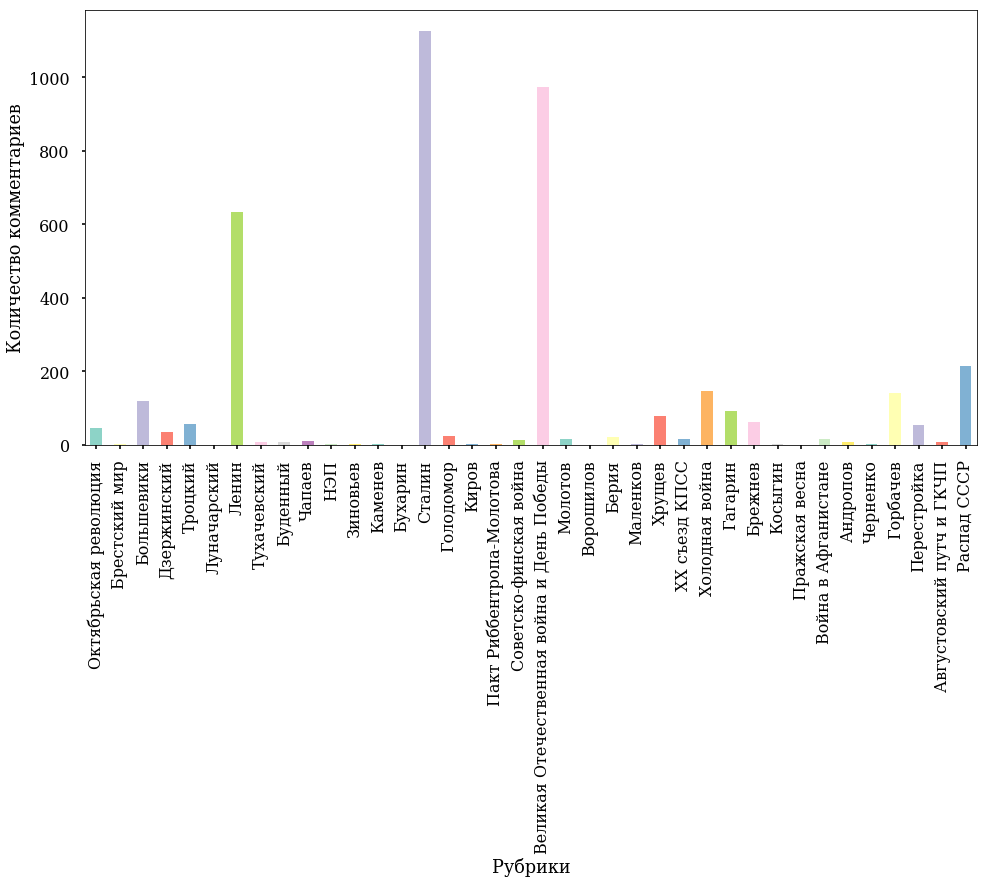

In [869]:
common_by_rubric = R[R.country==1].groupby(['rubric_id', 'rubric_title']).count()
ticks = [x[1] for x in common_by_rubric.comment_id.index.tolist()]
#print(ticks)
ax = common_by_rubric.comment_id.plot(kind='bar', figsize=(16,8))
plt.xlabel('Рубрики')
plt.ylabel('Количество комментариев')


q = ax.set_xticklabels(ticks)
plt.savefig('common_by_rubric.png', bbox_inches='tight')

In [211]:
common_by_rubric.comment_id.to_excel('common_by_rubric.xls')

In [282]:
merged[merged.rubric_id==44].shape

(434, 30)

In [381]:
s.df.drop_duplicates([''])
q = s[s.rubric_id == 44]
q.shape
#t = cleaned[cleaned.rubric_id_x == 8]

(305, 21)

In [438]:
df[df.rubric_id==7].shape

(43, 20)

In [856]:
#s = df.drop_duplicates(['comment_id', 'rubric_id'])
s = dcdf
q = s[s.rubric_id == 7]
q
#q[['comment_id', 'text', 'is_deleted']].to_excel('Dzerzhin.xls')
#t = cleaned[cleaned.rubric_id_x == 8]

,comment_id,characteristic,club_id,group,note,post_id,rubric_id,text,user_id,club_name,...,post,post_link,idx,comment_id_,rubric_id_,characteristic_,note_,is_deleted,is_chefdoeuvre,polarity
255,112510789_400267_400319,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,400267,7,Собственно говоря Дзержинский к массовым репре...,4007313,Mash | Мэш,...,112510789_400267,https://vk.com/public112510789?w=wall-11251078...,7_112510789_400267_400319,112510789_400267_400319,7.0,None,None,0.0,0.0,2.0
888,29534144_8243146_8243190,None,29534144,СОВЕТСКИЙ ПАНТЕОН,None,8243146,7,Позитивное отношение граждан к спецслужбам вед...,147760121,Лентач,...,29534144_8243146,https://vk.com/public29534144?w=wall-29534144_...,7_29534144_8243146_8243190,29534144_8243146_8243190,7.0,None,None,0.0,0.0,0.0
905,112510789_317570_317589,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,317570,7,Небось в моем любимом дзержинске это произошло,41123971,Mash | Мэш,...,112510789_317570,https://vk.com/public112510789?w=wall-11251078...,7_112510789_317570_317589,112510789_317570_317589,7.0,None,None,0.0,0.0,1.0
906,112510789_395761_399213,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,395761,7,11 сентября в Краснодаре задержали 35-летнего ...,182282038,Mash | Мэш,...,112510789_395761,https://vk.com/public112510789?w=wall-11251078...,7_112510789_395761_399213,112510789_395761_399213,7.0,None,None,0.0,0.0,1.0
907,112510789_400267_401181,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,400267,7,Я смотрю нам очень тяжело даётся дать объекту ...,394353,Mash | Мэш,...,112510789_400267,https://vk.com/public112510789?w=wall-11251078...,7_112510789_400267_401181,112510789_400267_401181,7.0,None,None,0.0,0.0,0.0
926,112510789_406393_406743,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,406393,7,при повороте с красина на проспект дзержинског...,7481814,Mash | Мэш,...,112510789_406393,https://vk.com/public112510789?w=wall-11251078...,7_112510789_406393_406743,112510789_406393_406743,7.0,None,None,0.0,0.0,1.0
927,112510789_816292_816474,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,816292,7,"Дзержинский не отстаёт, любимая развязка МКАД,...",11575507,Mash | Мэш,...,112510789_816292,https://vk.com/public112510789?w=wall-11251078...,7_112510789_816292_816474,112510789_816292_816474,7.0,None,None,0.0,0.0,1.0
928,15755094_17449192_17454701,None,15755094,СОВЕТСКИЙ ПАНТЕОН,None,17449192,7,"21 августа, AmurMedia. Задержанный по подозрен...",443184045,РИА Новости,...,15755094_17449192,https://vk.com/public15755094?w=wall-15755094_...,7_15755094_17449192_17454701,15755094_17449192_17454701,7.0,None,None,0.0,0.0,1.0
929,15755094_17459491_17459689,None,15755094,СОВЕТСКИЙ ПАНТЕОН,None,17459491,7,8. Память благодарной Нации\nУфа – столица баш...,309720123,РИА Новости,...,15755094_17459491,https://vk.com/public15755094?w=wall-15755094_...,7_15755094_17459491_17459689,15755094_17459491_17459689,7.0,None,None,0.0,0.0,0.0
933,15755094_18681940_18685371,None,15755094,СОВЕТСКИЙ ПАНТЕОН,None,18681940,7,"У нас в Харькове имеются улицы Гагарина, совет...",448885450,РИА Новости,...,15755094_18681940,https://vk.com/public15755094?w=wall-15755094_...,7_15755094_18681940_18685371,15755094_18681940_18685371,7.0,None,None,0.0,0.0,1.0


In [857]:
dz = pd.read_excel('Dzerzhin.xls')

In [858]:
z = dcdf.loc[dcdf.rubric_id==7, 'is_deleted']

In [859]:
dcdf.loc[dcdf.rubric_id==7]

,comment_id,characteristic,club_id,group,note,post_id,rubric_id,text,user_id,club_name,...,post,post_link,idx,comment_id_,rubric_id_,characteristic_,note_,is_deleted,is_chefdoeuvre,polarity
255,112510789_400267_400319,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,400267,7,Собственно говоря Дзержинский к массовым репре...,4007313,Mash | Мэш,...,112510789_400267,https://vk.com/public112510789?w=wall-11251078...,7_112510789_400267_400319,112510789_400267_400319,7.0,None,None,0.0,0.0,2.0
888,29534144_8243146_8243190,None,29534144,СОВЕТСКИЙ ПАНТЕОН,None,8243146,7,Позитивное отношение граждан к спецслужбам вед...,147760121,Лентач,...,29534144_8243146,https://vk.com/public29534144?w=wall-29534144_...,7_29534144_8243146_8243190,29534144_8243146_8243190,7.0,None,None,0.0,0.0,0.0
905,112510789_317570_317589,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,317570,7,Небось в моем любимом дзержинске это произошло,41123971,Mash | Мэш,...,112510789_317570,https://vk.com/public112510789?w=wall-11251078...,7_112510789_317570_317589,112510789_317570_317589,7.0,None,None,0.0,0.0,1.0
906,112510789_395761_399213,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,395761,7,11 сентября в Краснодаре задержали 35-летнего ...,182282038,Mash | Мэш,...,112510789_395761,https://vk.com/public112510789?w=wall-11251078...,7_112510789_395761_399213,112510789_395761_399213,7.0,None,None,0.0,0.0,1.0
907,112510789_400267_401181,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,400267,7,Я смотрю нам очень тяжело даётся дать объекту ...,394353,Mash | Мэш,...,112510789_400267,https://vk.com/public112510789?w=wall-11251078...,7_112510789_400267_401181,112510789_400267_401181,7.0,None,None,0.0,0.0,0.0
926,112510789_406393_406743,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,406393,7,при повороте с красина на проспект дзержинског...,7481814,Mash | Мэш,...,112510789_406393,https://vk.com/public112510789?w=wall-11251078...,7_112510789_406393_406743,112510789_406393_406743,7.0,None,None,0.0,0.0,1.0
927,112510789_816292_816474,None,112510789,СОВЕТСКИЙ ПАНТЕОН,None,816292,7,"Дзержинский не отстаёт, любимая развязка МКАД,...",11575507,Mash | Мэш,...,112510789_816292,https://vk.com/public112510789?w=wall-11251078...,7_112510789_816292_816474,112510789_816292_816474,7.0,None,None,0.0,0.0,1.0
928,15755094_17449192_17454701,None,15755094,СОВЕТСКИЙ ПАНТЕОН,None,17449192,7,"21 августа, AmurMedia. Задержанный по подозрен...",443184045,РИА Новости,...,15755094_17449192,https://vk.com/public15755094?w=wall-15755094_...,7_15755094_17449192_17454701,15755094_17449192_17454701,7.0,None,None,0.0,0.0,1.0
929,15755094_17459491_17459689,None,15755094,СОВЕТСКИЙ ПАНТЕОН,None,17459491,7,8. Память благодарной Нации\nУфа – столица баш...,309720123,РИА Новости,...,15755094_17459491,https://vk.com/public15755094?w=wall-15755094_...,7_15755094_17459491_17459689,15755094_17459491_17459689,7.0,None,None,0.0,0.0,0.0
933,15755094_18681940_18685371,None,15755094,СОВЕТСКИЙ ПАНТЕОН,None,18681940,7,"У нас в Харькове имеются улицы Гагарина, совет...",448885450,РИА Новости,...,15755094_18681940,https://vk.com/public15755094?w=wall-15755094_...,7_15755094_18681940_18685371,15755094_18681940_18685371,7.0,None,None,0.0,0.0,1.0


In [443]:
df.head()

,characteristic,club_id,group,note,post_id,rubric_id,text,user_id,club_name,rubric_name,first_name,last_name,sex,bdate,country,city,date,likes
comment_id,,,,,,,,,,,,,,,,,,
112510789_500477_501230,None,112510789,РЕВОЛЮЦИЯ,None,500477,1,Слава Великой Октябрьской Революции,211751432,Mash | Мэш,+Октябрьск* +революц*,Парниша,Просвета,2,1992-05-25,1,2,2017-10-26 02:04:38,4.0
15548215_542596_542599,None,15548215,РЕВОЛЮЦИЯ,None,542596,1,Сегодня пиарная машина Кремля устроила очередн...,430960989,ВЕДОМОСТИ,+Октябрьск* +революц*,Максим,Сараев,2,1992-01-03,None,None,2017-11-21 10:25:41,3.0
15548215_517193_517206,None,15548215,СОВЕТСКИЙ ПАНТЕОН,None,517193,10,"Я пости засмеялся. Чувак, обвиняюший Ленина в ...",430960989,ВЕДОМОСТИ,+Ленин* -Ленингр*,Максим,Сараев,2,1992-01-03,None,None,2017-10-06 04:43:04,1.0
29534144_7072909_7073095,None,29534144,СОВЕТСКАЯ АРМИЯ,None,7072909,17,Cамое страшное в сегодняшней России — это не к...,430960989,Лентач,РККА*,Максим,Сараев,2,1992-01-03,None,None,2017-08-25 13:25:41,10.0
29534144_7072909_7073095,None,29534144,СОВЕТСКАЯ АРМИЯ,None,7072909,17,Cамое страшное в сегодняшней России — это не к...,430960989,Лентач,РККА*,Максим,Сараев,2,1992-01-03,None,None,2017-08-25 13:25:41,10.0


In [362]:
w = cleaned.loc[(cleaned.rubric_id == 10) & cleaned.text.str.contains('метро')]
#w[w.text.str.contains('хрущевок')]
w.shape

(13, 30)

F:\Users\Kirill\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


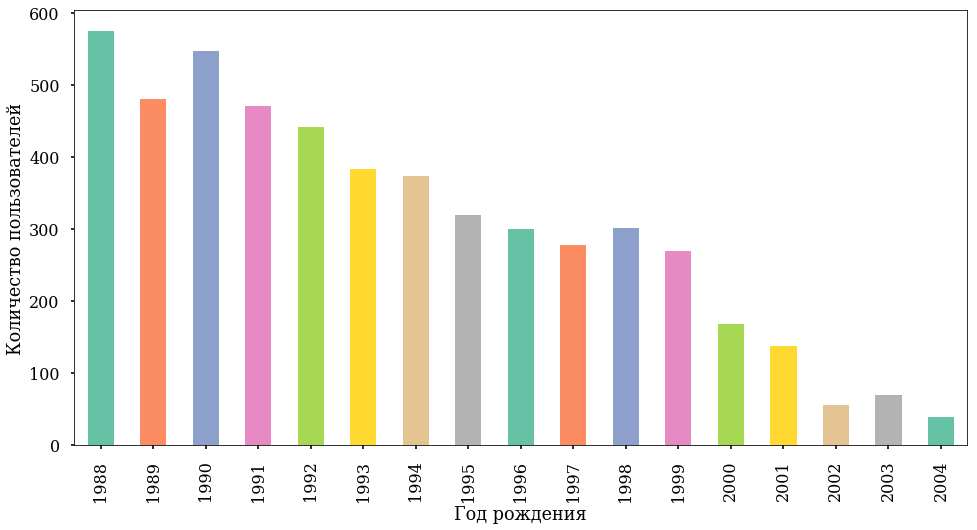

In [864]:
#By birthday
dcdf['byear'] = pd.to_datetime(dcdf.bdate).dt.year
dcdf.groupby(['byear']).count().user_id.plot(kind='bar', figsize=(16,8))
plt.xlabel('Год рождения')
plt.ylabel('Количество пользователей')
plt.savefig('common_by_birth.png', bbox_inches='tight')

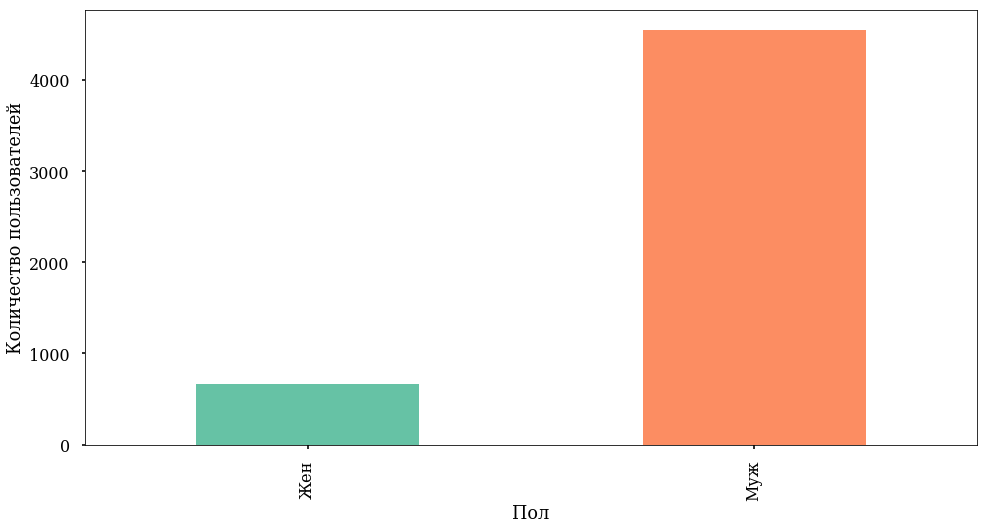

In [865]:
#By sex
ax = dcdf.groupby(['sex']).count().user_id.plot(kind='bar', figsize=(16,8))
ax.set_xticklabels(['Жен', 'Муж'])
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.savefig('common_by_sex.png', bbox_inches='tight')

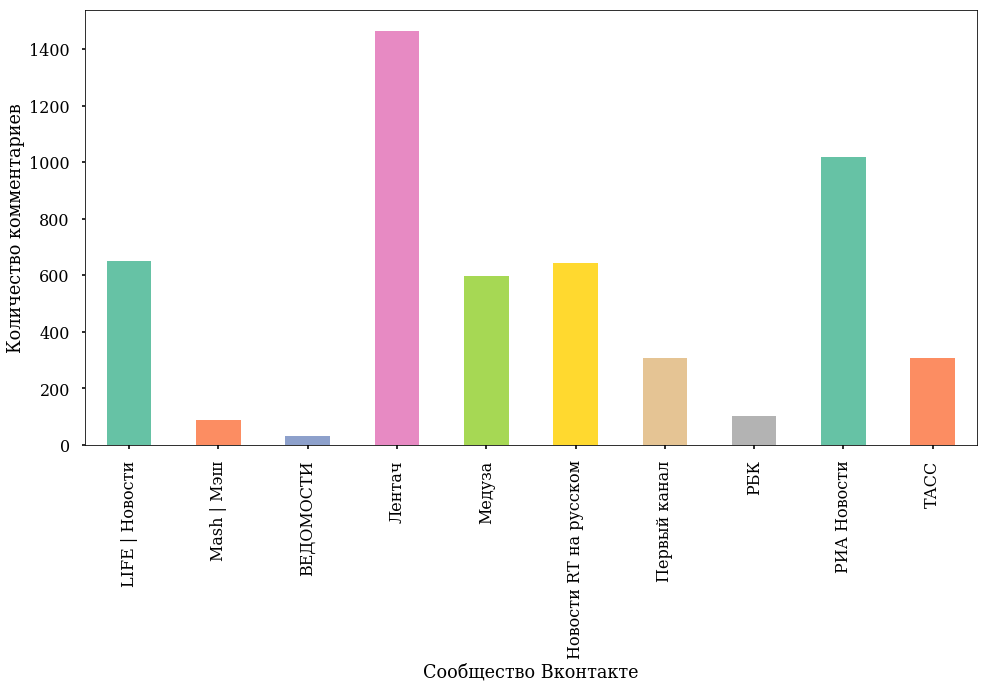

In [866]:
#By clubs
dcdf.groupby(['club_name']).count().comment_id.plot(kind='bar', figsize=(16,8))
plt.xlabel('Сообщество Вконтакте')
plt.ylabel('Количество комментариев')
plt.savefig('common_by_club.png', bbox_inches='tight')

In [526]:
citdcdf = pd.merge(dcdf, df_city_names, on='city')

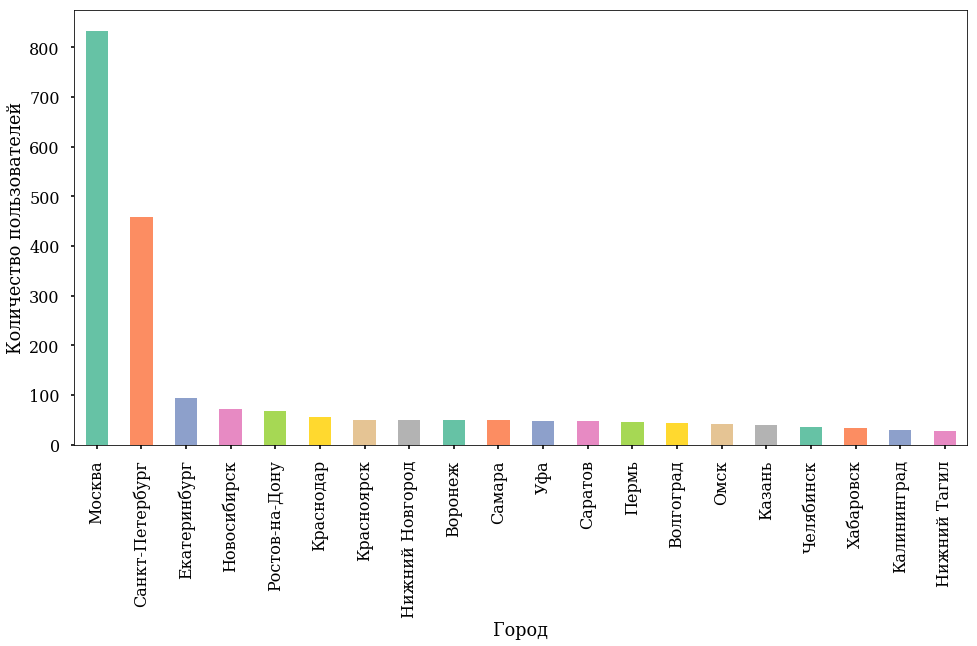

In [867]:
citdcdf[citdcdf.country==1].groupby(['city_name']).count().user_id.sort_values(ascending=False)[:20].plot(kind='bar', label='index', figsize=(16,8))
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.savefig('common_by_city.png', bbox_inches='tight')

In [816]:
def extract_temporal(df):
    temporal = df[['comment_id', 'date', 'rubric_id']]
    temporal.index = temporal.date
    temporal['datecol'] = temporal.date.dt.date
    temporal = temporal.loc['2015-01-01':]
    return temporal

    '''
    temporal['datecol'] = temporal.date.dt.date
    temporal.index = temporal.datecol

    #temporal.groupby(['datecol']).count().comment_id.values
    temporal['count_total'] = temporal.groupby(['datecol']).count().comment_id

    temporal['count'] = temporal[temporal.rubric_id==rubric_id].groupby(['datecol']).count().comment_id

    temporal['perc'] = temporal['count']/temporal.count_total
    temporal.head()
    return temporal
    '''



F:\Users\Kirill\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


IndexError: index 0 is out of bounds for axis 0 with size 0

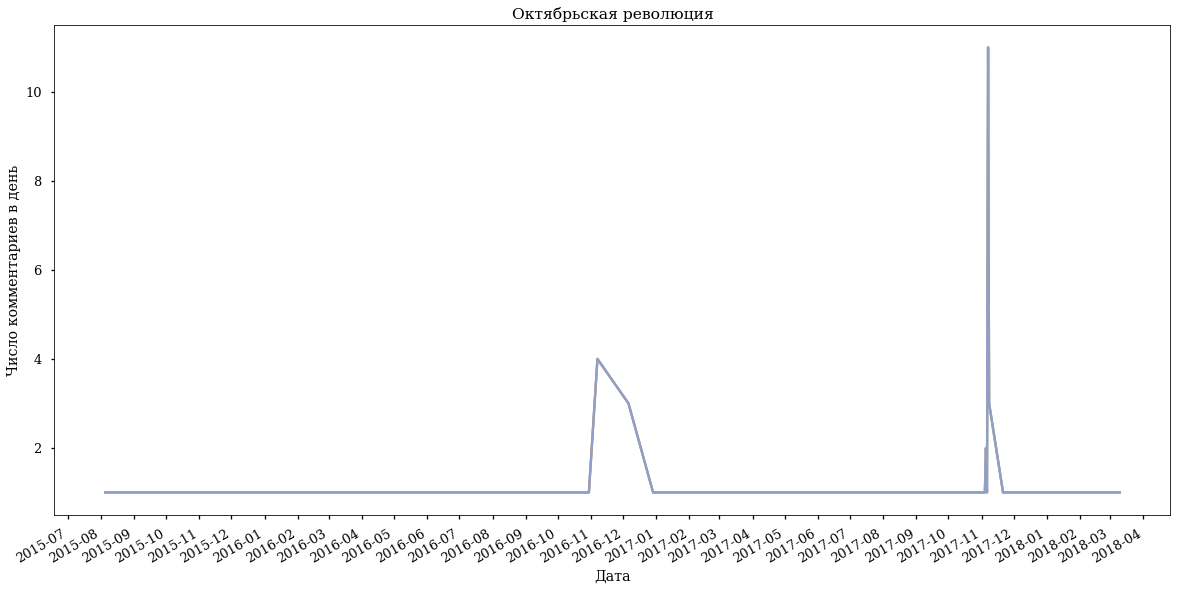

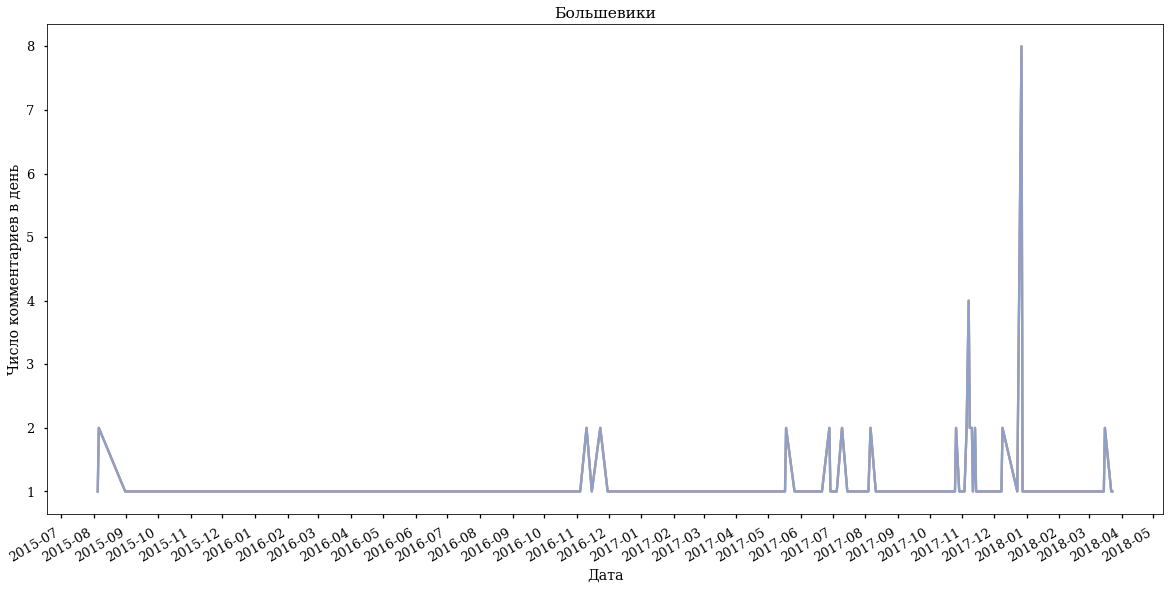

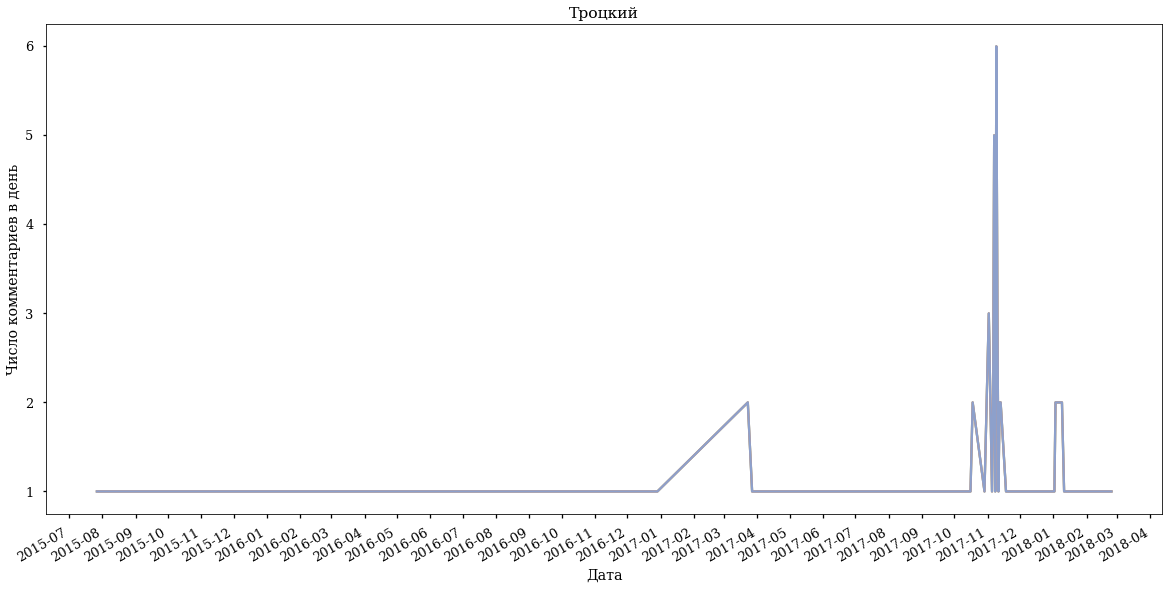

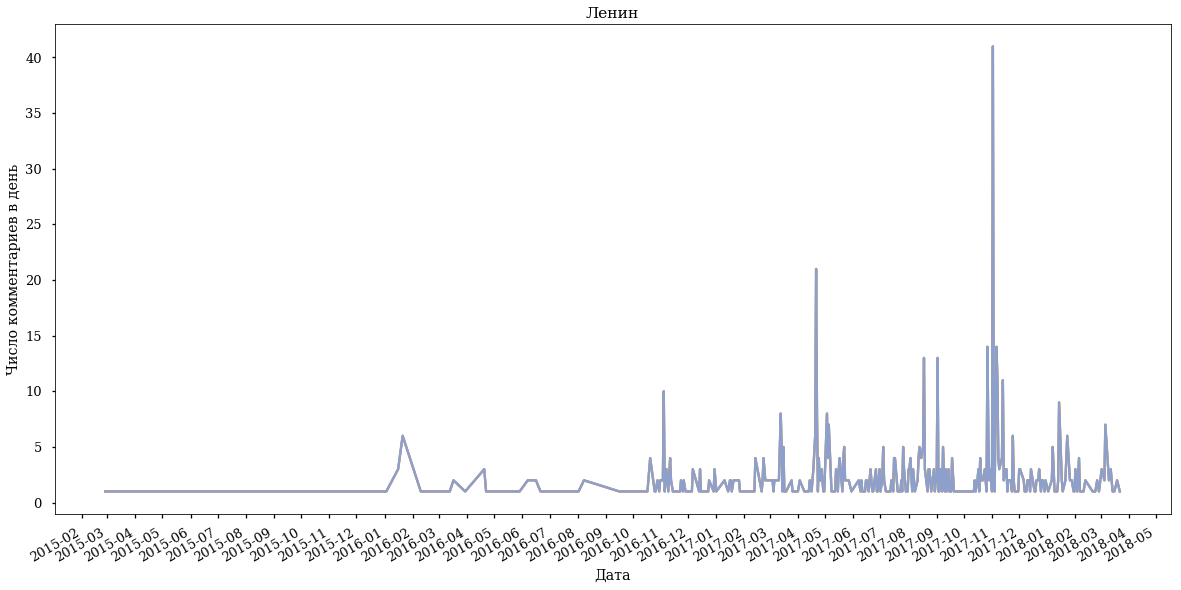

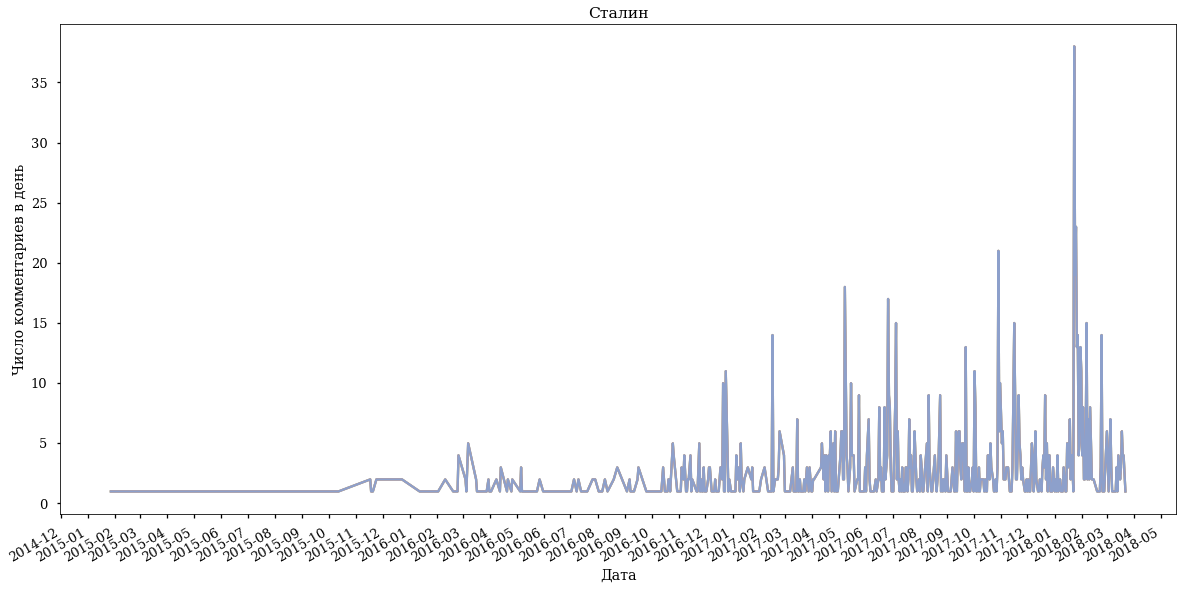

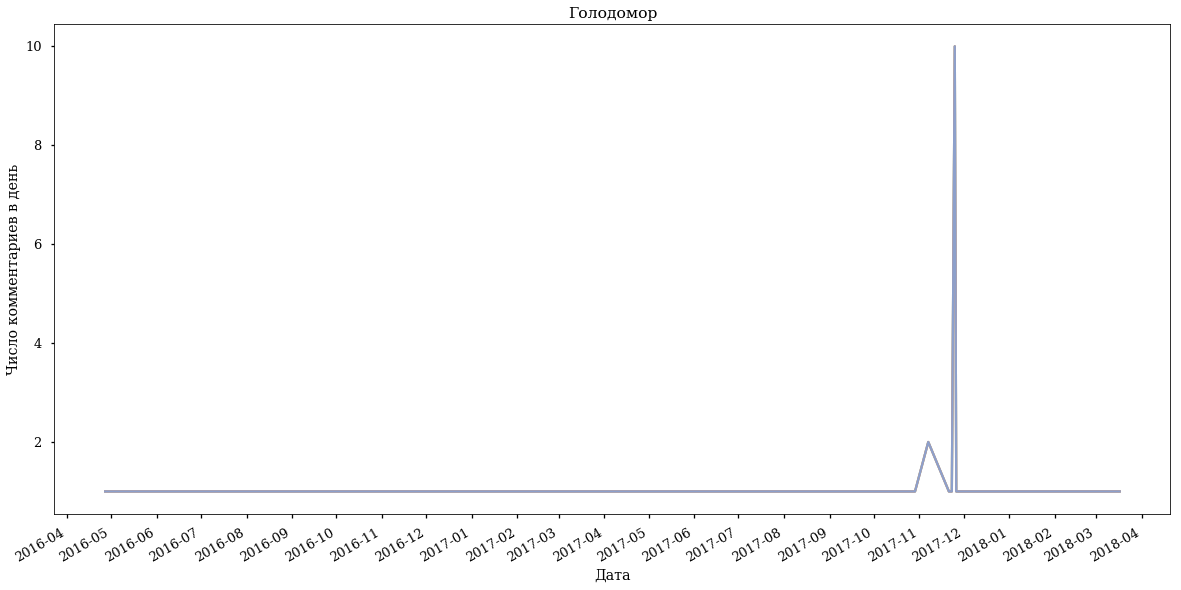

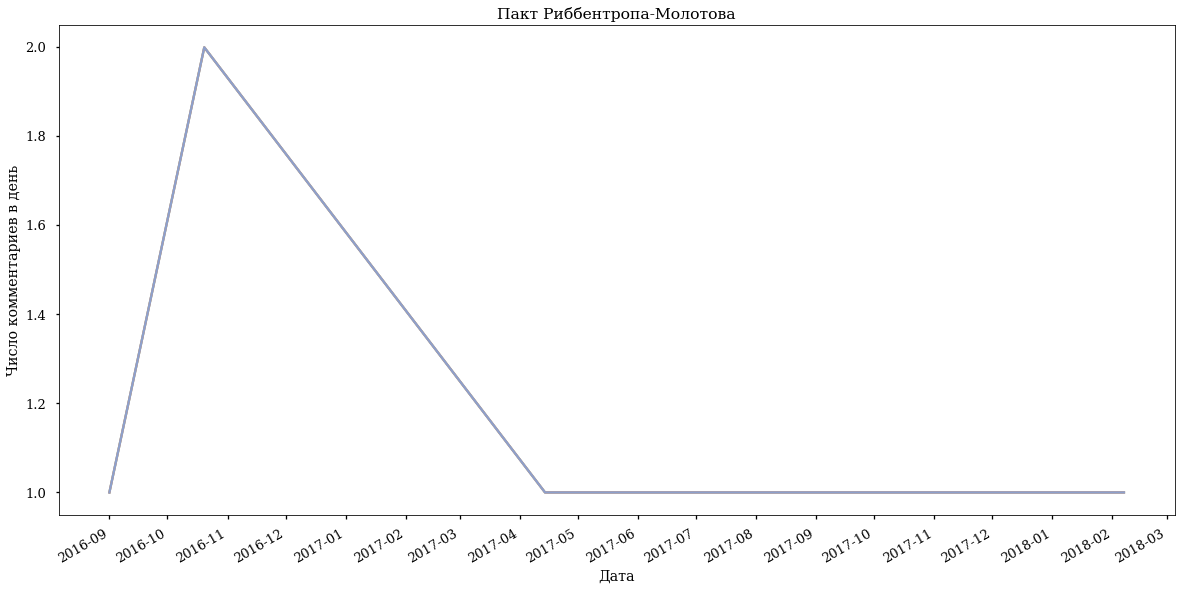

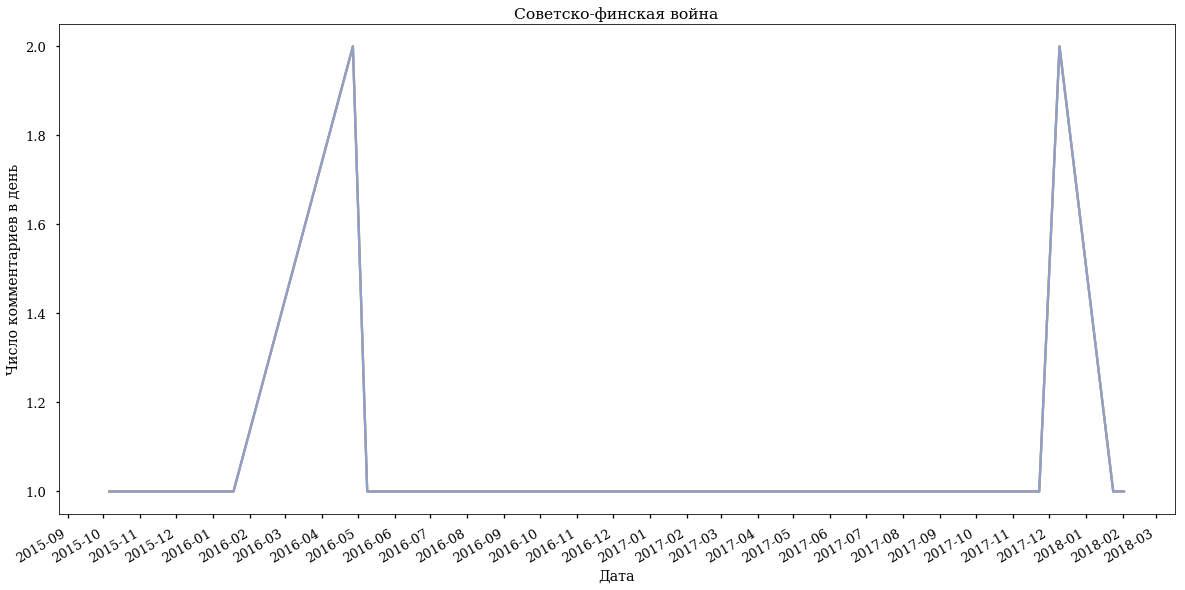

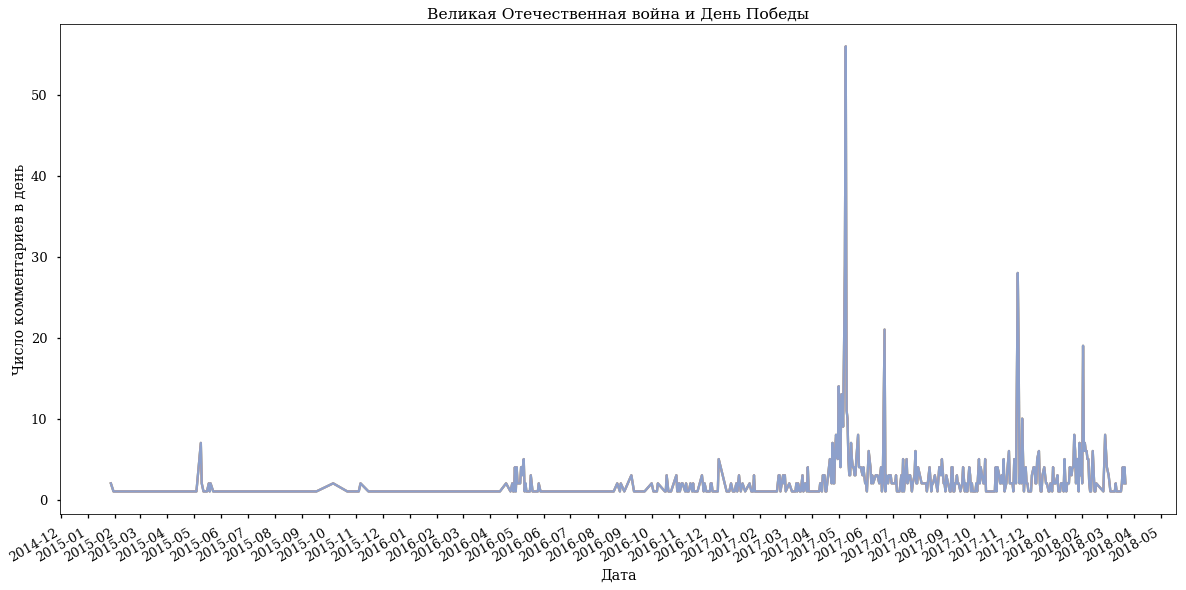

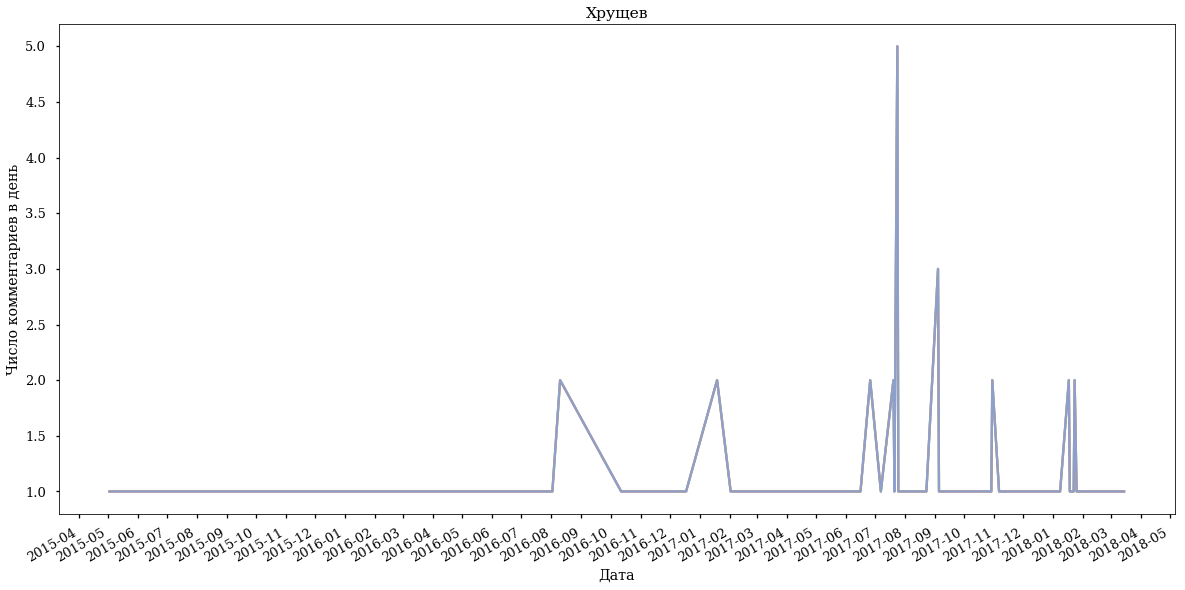

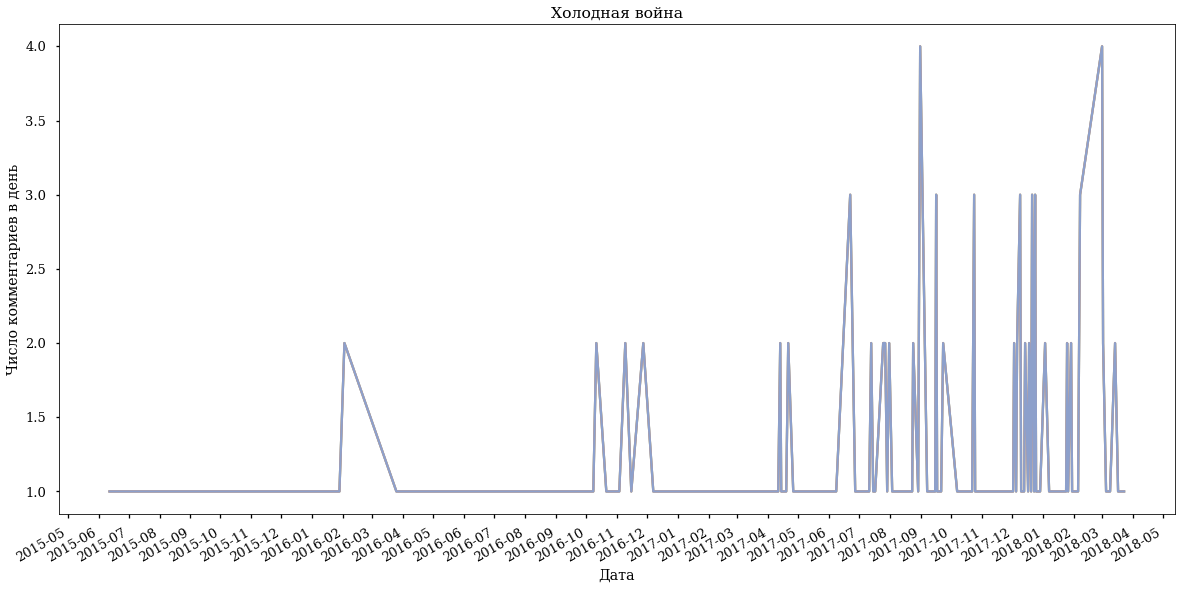

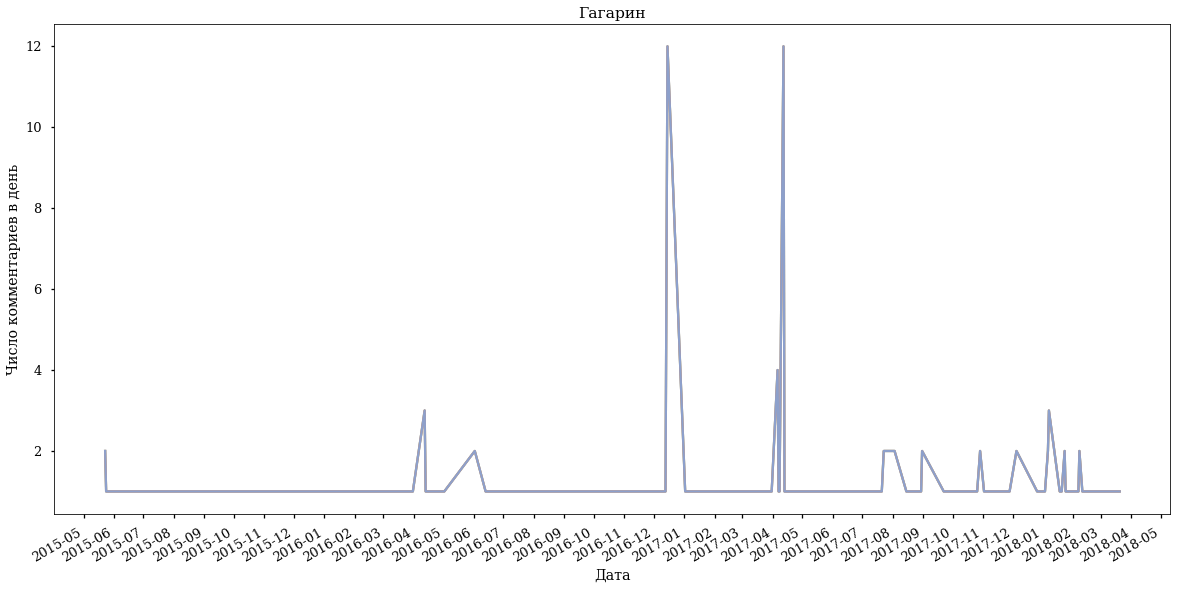

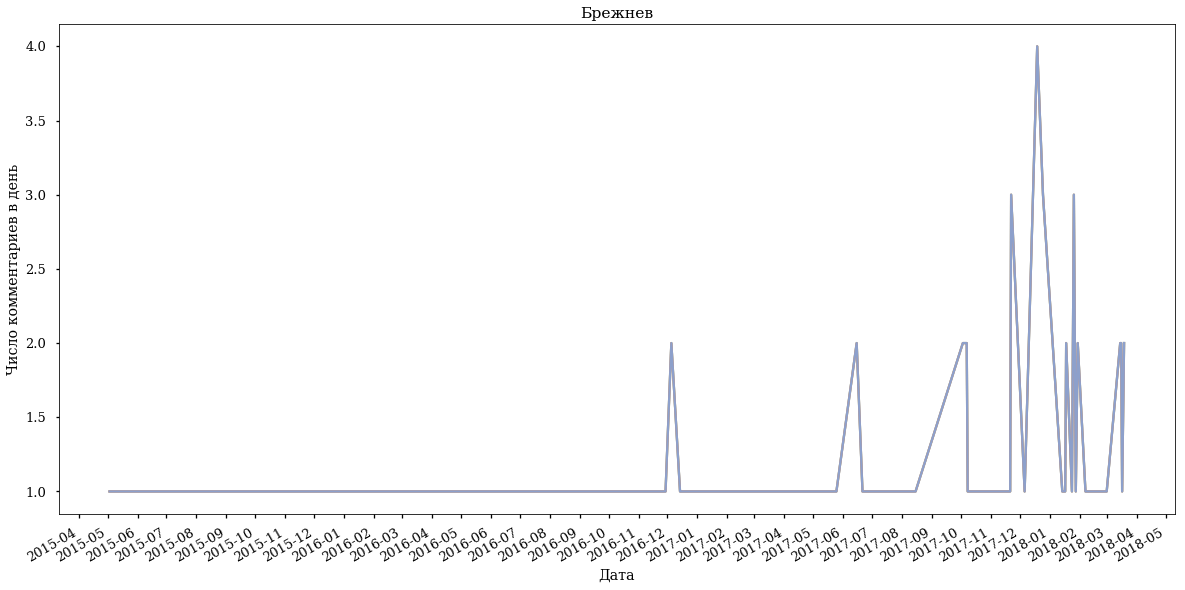

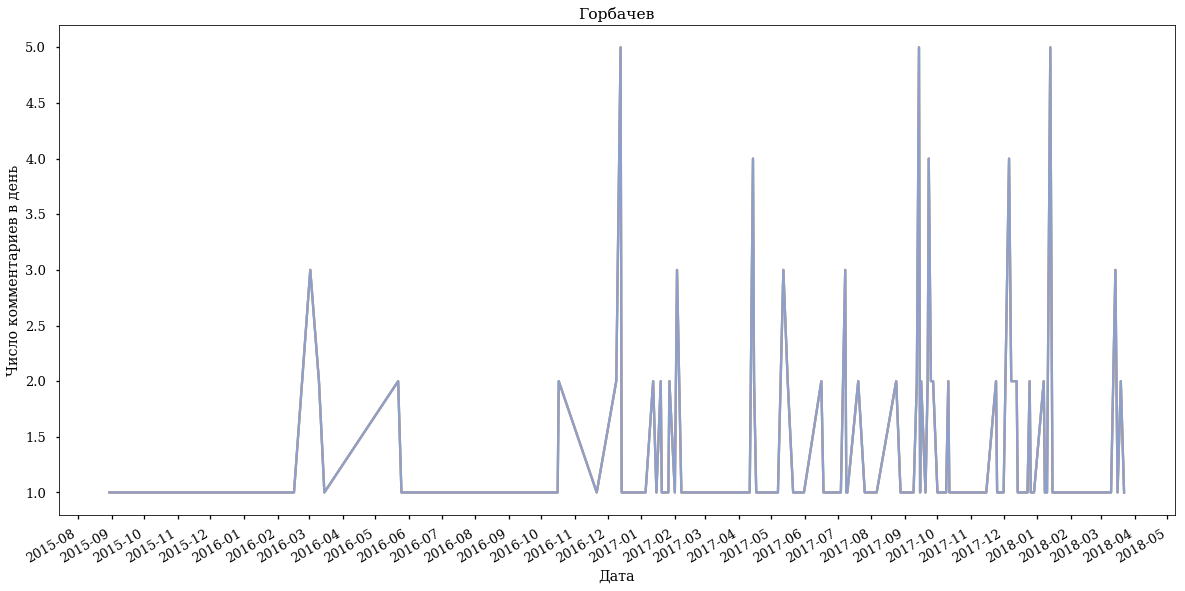

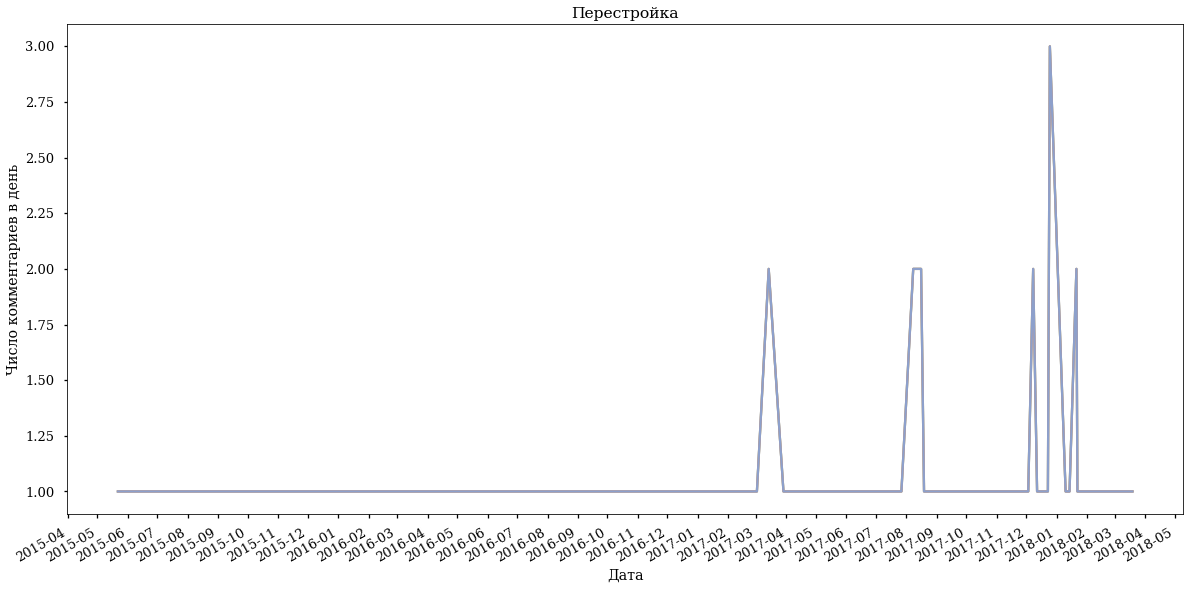

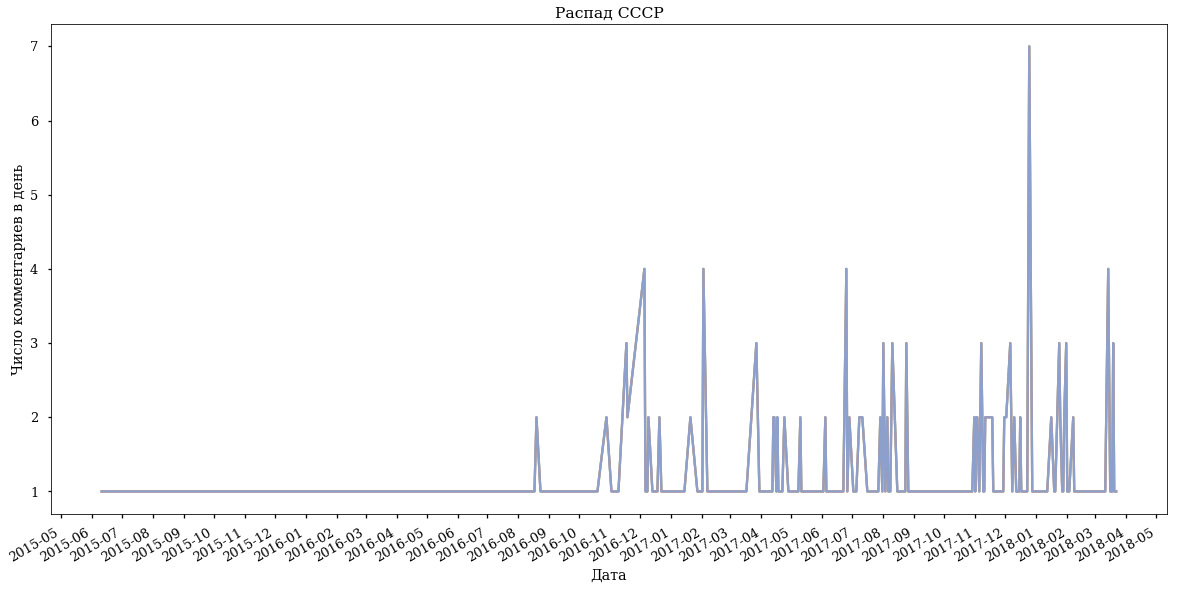

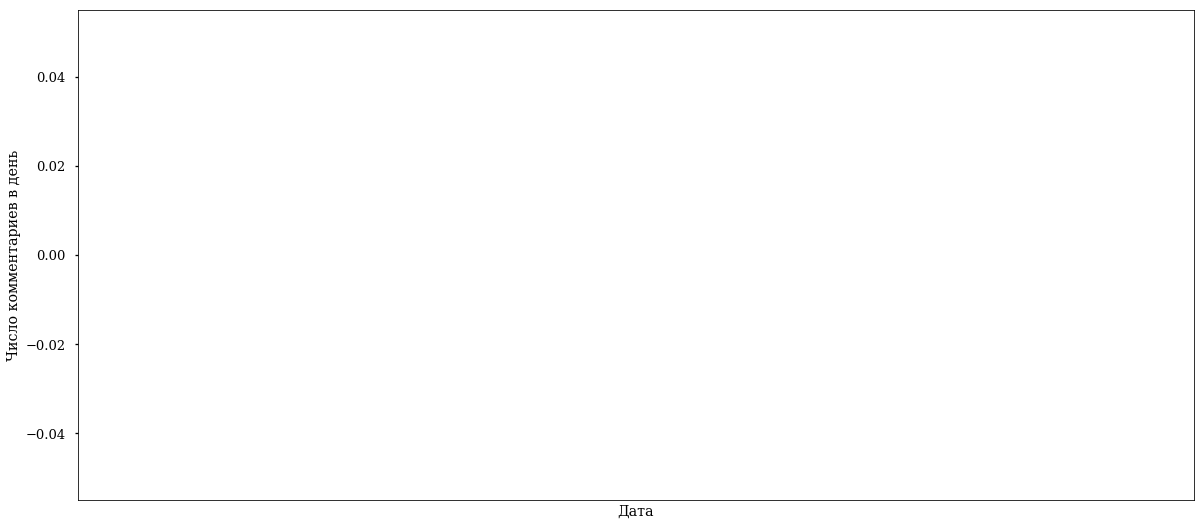

In [843]:
#TEMPORAL
todo_temporal = [1,3,8,10,22,24,30,31,36,44,46,48,53,63,64,67,69]

def draw_count_by_date(df, rubric_id):
    
    #temporal = df[df.rubric_id==rubric_id][['comment_id', 'date']]
    temporal = extract_temporal(df)
    temporal = temporal[temporal.rubric_id==rubric_id]
    #temporal.groupby(['datecol']).count().comment_id.to_excel('Dates_{}.xls'.format(rubric_id))
    #return None
    #gr = temporal.groupby(['datecol']).count()
    #temporal.index = temporal.date
    #fig, ax = plt.subplots(figsize=(25,10))
    
    #fig = plt.figure()
    #ax = temporal.groupby(['datecol']).count().plot(y='comment_id', use_index=True, figsize=(20,10))
    #ax.plot(gr.count().index, gr.count().comment_id)
    
    fig, ax = plt.subplots(figsize=(20,10))
    #ax = temporal.groupby(['date']).count().plot(figsize=(16,12))
    ax.plot(temporal.groupby(['datecol']).count())

    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    fig.autofmt_xdate()
    
    plt.xlabel('Дата')
    plt.ylabel('Число комментариев в день')
    
    plt.title(df[df.rubric_id==rubric_id].rubric_title.unique()[0])
    plt.savefig('dates_{}.png'.format(rubric_id))

sns.set_context('talk')
for rid in todo_temporal:
    draw_count_by_date(R, rid)

In [806]:
dcdf[dcdf.country!=1].city.unique().shape

(226,)

In [880]:
q = R[(R.country==1)]
q[q.rubric_id==10].shape

(634, 30)

In [887]:
R.to_pickle('dcdf.pickle')